# EXAMEN DE PRÁCTICAS - ESTADÍSTICA

**Contexto:** Un estudio biológico sobre tres especies de pingüinos en la Antártida. Es un clásico para sustituir al antiguo dataset "Iris".

* **Fichero:** `penguins.csv`
* **Variables a usar:** `Masa_Corporal` (en gramos) y `Longitud_Aleta` (en mm).

### Ejercicio 1 (0.25 pts.)
Importa el fichero `penguins.csv` y muestra el principio y final. ¿Qué tipo de variables son la masa corporal y la longitud de la aleta?

In [1]:
# Ejercicio 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Leemos el fichero de datos
datos = pd.read_csv("penguins.csv")

# Mostramos el principio y el final de la tabla
display(datos.head())
display(datos.tail())

# Número de pingüinos (filas) y número de variables (columnas)
n_filas, n_columnas = datos.shape
print("Número de pingüinos (filas):", n_filas)
print("Número de variables (columnas):", n_columnas)

print("\nTipos de las variables:")
print(datos.dtypes)

print(
    "\nTanto Masa_Corporal como Longitud_Aleta son variables "
    "cuantitativas continuas medidas en escala de razón."
)


,Masa_Corporal,Longitud_Aleta
0,3900,186
1,3800,195
2,4250,205
3,3450,190
4,3650,195


,Masa_Corporal,Longitud_Aleta
45,4700,214
46,3500,187
47,3950,196
48,4150,125
49,5050,217


Número de pingüinos (filas): 50
Número de variables (columnas): 2

Tipos de las variables:
Masa_Corporal     int64
Longitud_Aleta    int64
dtype: object

Tanto Masa_Corporal como Longitud_Aleta son variables cuantitativas continuas medidas en escala de razón.


### Ejercicio 2 (0.3 pts.)
Calcula el histograma de la `Masa_Corporal`. Corta esta variable basándote en los intervalos (bins) del histograma y muestra la tabla de frecuencias absolutas de la variable cortada. ¿Qué sacas en claro de la distribución del peso?

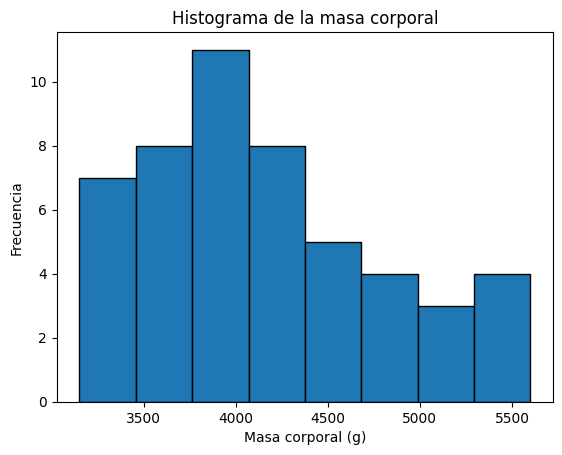

,Frecuencia,Frecuencia_relativa
Masa_Corporal,,
"(3149.999, 3558.333]",9,0.18
"(3558.333, 3966.667]",14,0.28
"(3966.667, 4375.0]",11,0.22
"(4375.0, 4783.333]",7,0.14
"(4783.333, 5191.667]",4,0.08
"(5191.667, 5600.0]",5,0.10


In [2]:
# Ejercicio 2

# Histograma de la masa corporal
plt.figure()
plt.hist(datos["Masa_Corporal"], bins=8, edgecolor="black")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.title("Histograma de la masa corporal")
plt.show()

# Construimos una tabla de frecuencias por intervalos
min_w = datos["Masa_Corporal"].min()
max_w = datos["Masa_Corporal"].max()

# Tomamos 6 clases aproximadamente, como en la práctica
clases = np.linspace(min_w, max_w, 7)
intervalos = pd.cut(datos["Masa_Corporal"], bins=clases, include_lowest=True)

frecuencia = intervalos.value_counts().sort_index()
frecuencia_relativa = (frecuencia / len(datos)).round(3)

tabla_frec = pd.DataFrame(
    {
        "Frecuencia": frecuencia,
        "Frecuencia_relativa": frecuencia_relativa,
    }
)

tabla_frec


### Ejercicio 3 (0.25 pts.)
Estudia los cuartiles y detecta si existen datos atípicos en la `Longitud_Aleta`. Compruébalo dibujando su diagrama de caja-bigotes (boxplot).

Q1 = 190.00 mm
Mediana (Q2) = 195.50 mm
Q3 = 212.75 mm
IQR = 22.75 mm
Límite inferior para atípicos = 155.88 mm
Límite superior para atípicos = 246.88 mm

Datos atípicos en Longitud_Aleta:


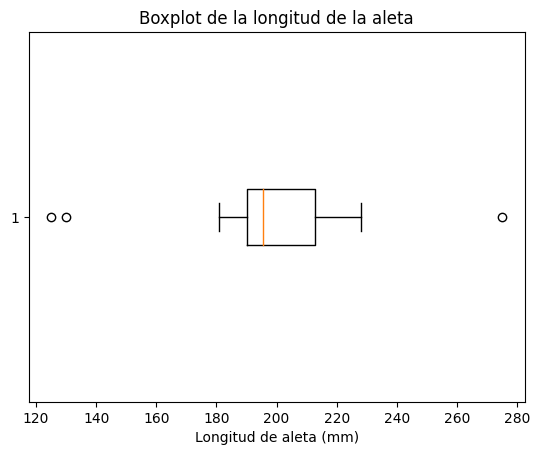

In [3]:
# Ejercicio 3

longitudes = datos["Longitud_Aleta"]

# Cuartiles y rango intercuartílico
q1 = longitudes.quantile(0.25)
q2 = longitudes.quantile(0.50)
q3 = longitudes.quantile(0.75)
iqr = q3 - q1

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

print(f"Q1 = {q1:.2f} mm")
print(f"Mediana (Q2) = {q2:.2f} mm")
print(f"Q3 = {q3:.2f} mm")
print(f"IQR = {iqr:.2f} mm")
print(f"Límite inferior para atípicos = {lim_inf:.2f} mm")
print(f"Límite superior para atípicos = {lim_sup:.2f} mm")

# Datos atípicos según el criterio de los bigotes
atipicos = datos[(longitudes < lim_inf) | (longitudes > lim_sup)]
print("\nDatos atípicos en Longitud_Aleta:")
atipicos

# Boxplot de la longitud de la aleta
plt.figure()
plt.boxplot(longitudes, vert=False)
plt.xlabel("Longitud de aleta (mm)")
plt.title("Boxplot de la longitud de la aleta")
plt.show()


### Ejercicio 4 (0.25 pts.)
Clasifica `Masa_Corporal` en tres categorías: **Ligero** (hasta 3500g), **Pesado** (más de 5000g) y **Estándar** (el resto). Clasifica `Longitud_Aleta` en dos: **Aleta_Corta** (hasta 200mm) y **Aleta_Larga** (más de 200mm).

In [4]:
# Ejercicio 4

# Clasificamos Masa_Corporal en tres categorías:
#   Ligero   : hasta 3800 g
#   Pesado   : más de 5000 g
#   Estándar : el resto

def tipo_peso(m):
    if m <= 3800:
        return "Ligero"
    elif m > 5000:
        return "Pesado"
    else:
        return "Estandar"

# Clasificamos Longitud_Aleta en dos categorías:
#   Aleta_Corta : hasta 200 mm
#   Aleta_Larga : más de 200 mm

def tipo_aleta(l):
    if l <= 200:
        return "Aleta_Corta"
    else:
        return "Aleta_Larga"

datos["Tipo_Peso"] = datos["Masa_Corporal"].apply(tipo_peso)
datos["Tam_Aleta"] = datos["Longitud_Aleta"].apply(tipo_aleta)

datos[["Masa_Corporal", "Tipo_Peso", "Longitud_Aleta", "Tam_Aleta"]].head()


,Masa_Corporal,Tipo_Peso,Longitud_Aleta,Tam_Aleta
0,3900,Estandar,186,Aleta_Corta
1,3800,Ligero,195,Aleta_Corta
2,4250,Estandar,205,Aleta_Larga
3,3450,Ligero,190,Aleta_Corta
4,3650,Ligero,195,Aleta_Corta


### Ejercicio 5 (0.35 pts.)
¿Existe relación entre el tipo de peso y el tamaño de la aleta? Crea una tabla de contingencia cruzando ambas variables categóricas y coméntala.

In [5]:
# Ejercicio 5

# Tabla de contingencia entre tipo de peso y tamaño de la aleta
tabla = pd.crosstab(datos["Tipo_Peso"], datos["Tam_Aleta"])
tabla_rel = pd.crosstab(
    datos["Tipo_Peso"],
    datos["Tam_Aleta"],
    normalize="index"
).round(3)

print("Tabla de contingencia (frecuencias absolutas):")
display(tabla)

print("\nTabla de contingencia (frecuencias relativas por fila):")
display(tabla_rel)


Tabla de contingencia (frecuencias absolutas):


Tam_Aleta,Aleta_Corta,Aleta_Larga
Tipo_Peso,,
Estandar,12,13
Ligero,18,0
Pesado,0,7



Tabla de contingencia (frecuencias relativas por fila):


Tam_Aleta,Aleta_Corta,Aleta_Larga
Tipo_Peso,,
Estandar,0.48,0.52
Ligero,1.00,0.00
Pesado,0.00,1.00


### Ejercicio 6 (0.35 pts.)
¿Representa bien los datos la recta de regresión de la `Longitud_Aleta` respecto a la `Masa_Corporal`? Lleva a cabo un modelo logarítmico $L(m) = a \ln(m) + b$ e indica su bondad de ajuste ($R^2$).

Modelo lineal: L(m) = 0.02017 * m + 115.03
R^2 (lineal) = 0.3387


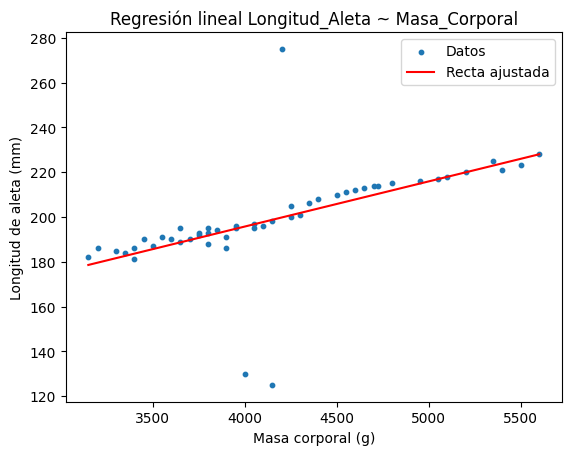

Modelo logarítmico: L(m) = 84.97247 * ln(m) + -508.22
R^2 (logarítmico) = 0.3317


In [6]:
# Ejercicio 6

# Ajuste de modelos de regresión para Longitud_Aleta (L) respecto a Masa_Corporal (m)
X = datos["Masa_Corporal"].values.astype(float)
y = datos["Longitud_Aleta"].values.astype(float)

# Modelo lineal: L(m) = a * m + b
a_lin, b_lin = np.polyfit(X, y, 1)
y_est_lin = a_lin * X + b_lin

ss_res_lin = np.sum((y - y_est_lin) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
R2_lin = 1 - ss_res_lin / ss_tot

print(f"Modelo lineal: L(m) = {a_lin:.5f} * m + {b_lin:.2f}")
print(f"R^2 (lineal) = {R2_lin:.4f}")

# Representación gráfica
plt.scatter(X, y, s=10, label="Datos")
malla = np.linspace(X.min(), X.max(), 100)
plt.plot(malla, a_lin * malla + b_lin, color="red", label="Recta ajustada")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Longitud de aleta (mm)")
plt.title("Regresión lineal Longitud_Aleta ~ Masa_Corporal")
plt.legend()
plt.show()

# Modelo logarítmico: L(m) = a * ln(m) + b
logX = np.log(X)
a_log, b_log = np.polyfit(logX, y, 1)
y_est_log = a_log * logX + b_log

ss_res_log = np.sum((y - y_est_log) ** 2)
R2_log = 1 - ss_res_log / ss_tot

print(f"Modelo logarítmico: L(m) = {a_log:.5f} * ln(m) + {b_log:.2f}")
print(f"R^2 (logarítmico) = {R2_log:.4f}")


### Ejercicio 7 (0.25 pts.)
Predice la longitud de aleta de un pingüino que pesa 4200 g, usando los dos modelos anteriores.

In [7]:
# Ejercicio 7

m_nuevo = 4200  # masa corporal del nuevo pingüino (g)

# Predicción con el modelo lineal
L_lin_4200 = a_lin * m_nuevo + b_lin

# Predicción con el modelo logarítmico
L_log_4200 = a_log * np.log(m_nuevo) + b_log

print(f"Predicción (modelo lineal) para 4200 g: {L_lin_4200:.2f} mm")
print(f"Predicción (modelo logarítmico) para 4200 g: {L_log_4200:.2f} mm")


Predicción (modelo lineal) para 4200 g: 199.74 mm
Predicción (modelo logarítmico) para 4200 g: 200.69 mm
